# Otsu Thresholding
 In scientific image processing it is almost always important to separate the observed objects from their background. This 
 is complicated by inhomogeneity and noise of the background. Thresholding is a method which binarizes images by 
 assigning eache pixel ($p$) to one of two values (mostly range $max(=L)$ or $min(=0)$) due to its original value($v$). 
 Therefore a value needs to be defined as threshold ($k$) for separation of pixels being brighter 
 ($v_{p}>k \to v_{p}=v_{max}$) or darker ($v_{p}<=k \to v_{p}=v_{0}$). The difficulty at this point is to find a proper 
 threshold to separate dark and bride so that the whole background but just the background is assigned as background.     
 
 In 1979 Nobuyuki Otsu published a paper that describes a method to find a threshold giving a very good separation of 
 pixels. This is achieved by computing each threshold and assign each pixel to a class ($0$ or $L$). The threshold with
 the smallest intraclass variance or also the highest interclass variance is chosen and declared to be optimal. In other
 words, the threshold with the best separation of bright and dark pixels is optimal.     

 In the following Otsu thresholding will be applied to a image set to separate the nuclei shown on it. Several 
 measurements are shown to increase the goodness of the method. To illustrate the use of this work a possible application 
 is shown in the final part.


## Data set  
The given data set  BBBC020 from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012] consists 
of 25 times 3 images of macrophages. Two channels took images of the cell membrane stained with CD11b/APC and the 
nucleus stained with DAPI. The third version of each of the 25 images is a merge of the two channels.

In this project I focused on the nuclei. 
An example image and its intensity histogram is shown below after unzipping and arranging a folder that can be worked 
with easily. All following methods were explained, performed and visualized with the following image.   


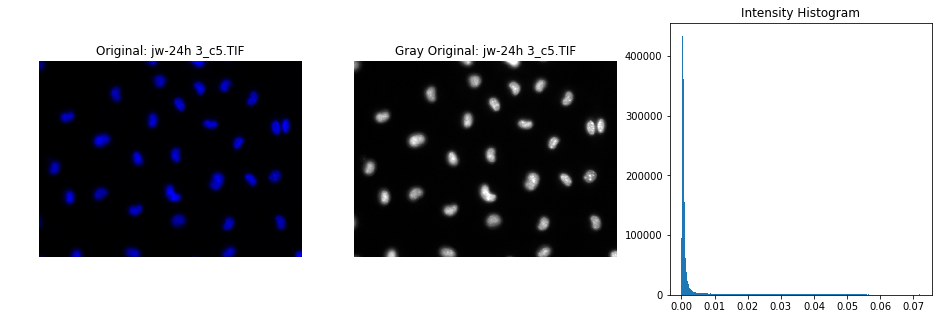

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import skimage.io
import skimage.filters
import dice as dic
import get_im as im
import enhance as enh
import re
import improvements as imp

testing = 'BBBC020_v1_images.zip'
im.create_unzipped_files_if_there_are_no(testing, 'all images')
image_directory = 'all images/BBBC020_v1_images/'
path_list, name_list = im.image_path_name_list(image_directory, '24h 3_c5.TIF')

figure_original, axes = plt.subplots(1, 3, figsize=(16, 5))
original_image = im.import_image(path_list[0])

axes[0].imshow(skimage.io.imread(path_list[0]))
axes[0].set_title('Original: ' + name_list[0])
axes[0].axis('off')

axes[1].imshow(original_image, cmap=plt.cm.gray)
axes[1].set_title('Gray Original: ' + name_list[0])
axes[1].axis('off')

axes[2].hist(original_image.ravel(), bins=256)
axes[2].set_title('Intensity Histogram')

plt.show()


## Example of Thresholding
Shown below is the original image and the Otsu tresholded one. Also illustrated is the appearance of the same image with
a critically low and high threshold. These tresholds ($0.15*$ Otsu & $1.9*$ Otsu) are chosen to  exaggeratedly show the 
effect of poor thresholding. Notice the unrepresentative large area the nuclei occupy with a low threshold. By 
decreasing the threshold further, nuclei will grow together and brighter spots deriving from background noise will 
appear. With a too high threshold it is reverse. Nuclei will divide into those spots within a nucleus peaking the images
spectrum as you can see in the middle of the very right.    
  


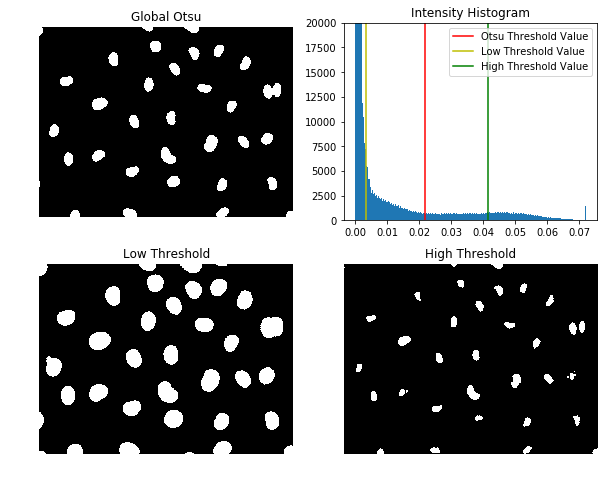

In [13]:
import skimage.filters

thresh_value = skimage.filters.threshold_otsu(original_image)
binary_otsu = original_image > thresh_value

binary_low = original_image > thresh_value*0.15
binary_high = original_image > thresh_value*1.9 

figure_thresholds, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0][0].imshow(binary_otsu, cmap=plt.cm.gray)
axes[0][0].set_title('Global Otsu')
axes[0][0].axis('off')

axes[0][1].hist(original_image.ravel(), bins=256)
axes[0][1].set_ylim(top=20000)
axes[0][1].set_title('Intensity Histogram')
axes[0][1].axvline(thresh_value, color='r', label='Otsu Threshold Value')
axes[0][1].axvline(thresh_value*0.15, color='y', label='Low Threshold Value')
axes[0][1].axvline(thresh_value*1.9, color='g', label='High Threshold Value')
axes[0][1].legend()

axes[1][0].imshow(binary_low, cmap=plt.cm.gray)
axes[1][0].set_title('Low Threshold')
axes[1][0].axis('off')

axes[1][1].imshow(binary_high, cmap=plt.cm.gray)
axes[1][1].set_title('High Threshold')
axes[1][1].axis('off')

plt.show()



## Control Data Set 
The given ground truth data set consist of binary valued ($b/w$) images showing always one nucleus for easier segmentation 
evaluation. This nucleus is cut out by an human and declared to be optimal.     


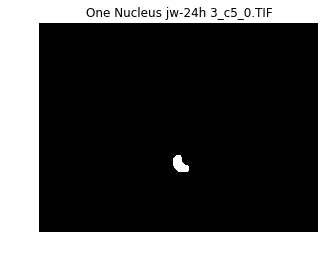

In [8]:
control = 'BBBC020_v1_outlines_nuclei.zip'
im.create_unzipped_files_if_there_are_no(control, 'all controls')
control_directory = 'all controls/BBC020_v1_outlines_nuclei/'
path_list_control, name_list_control = im.image_path_name_list(control_directory, '24h 3_c5_0.TIF')

figure_single_nucleus, axes = plt.subplots(1, 1, figsize=(5, 5))
control_nucleus = im.import_image(path_list_control[0])
axes.imshow(control_nucleus, cmap=plt.cm.gray)
axes.set_title('One Nucleus ' + name_list_control[0])
axes.axis('off')
plt.show()



For the purpose of thresholding these images need to be assembled to one image containing all nuclei of the ground truth
 data set. 


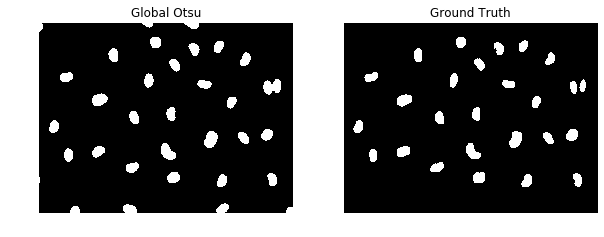

In [9]:
import get_im as im
import re

control_search_filter = re.compile('.*24h 3_c5.TIF'[:-4]+'.*')
binary_control, optimal_counter = im.assemble_import_control_image(control_directory, control_search_filter)

figure_control, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[1].imshow(binary_control, cmap=plt.cm.gray)
axes[1].set_title('Ground Truth')
axes[1].axis('off')

axes[0].imshow(binary_otsu, cmap=plt.cm.gray)
axes[0].set_title('Global Otsu')
axes[0].axis('off')

plt.show()


It can already be seen that nuclei reaching out of the frame were cut out. In other images it can be seen that other 
nuclei that could not be separated are cut out as well. This is done due to inappropriate segmentation methodologies and 
to avoid supply of poor segmented ground truths. 
The missing nuclei will disturb our Dice score in later processing. Also notice the inferior separation of the two 
nuclei in the upper right.    

## Getting the matches

High contrast visualization of differences between the Otsu thresholded original image and the ground truth is acquired 
by comparing them after overlaying. Differences are shown in black, similarities in white. 
* ($b$&$b \to w$)
* ($w$&$w \to w$) 
* ($w$&$b \to b$) 
* ($b$&$w \to b$)

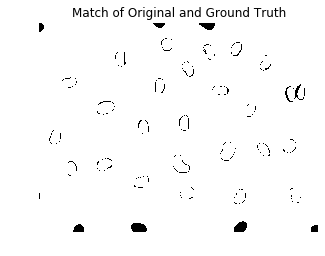

In [10]:
import dice as dic

match = dic.creation_of_match_array(binary_otsu, binary_control)

figure_match, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.imshow(match, cmap=plt.cm.gray)
axes.set_title('Match of Original and Ground Truth')
axes.axis('off')
plt.show()


## Calculation of Dice score 
The Dice score is calculated as follows. Notice that the score resembles not the percentage of correct assigned pixels.

$$Ds=\frac{2w}{2w+b}$$

The Dice score from the above shown match is calculated.



In [11]:
dice_score_global = dic.dice_score(binary_otsu, binary_control)
print('Global Dice score: ', dice_score_global)


Global Dice score:  0.9903929544602541


# Increasing the Dice score 
Several methods were used and the effect on the Dice score documented. 
* Application of Local Otsu Thresholding at different sizes of loci-radius
* Gaussian filtering with different sigma values and median filtering with each pixels eight surrounding pixels 
* Edge detection and addition (edging)

### Local Otsu Thresholding
Otsu thresholding is applied on each pixel giving it a threshold defined by its surrounding within a certain radius. 
The threshold map shows the threshold assigned to each pixel on the position of the pixel. Due to this map the function
decides whether the pixel exceeds or falls below its threshold.  
The problem of precision loss stated in the UserWarning from skimage is not taken into account since we use these images
for binarization which is a loss of spectral variety anyway.  



C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


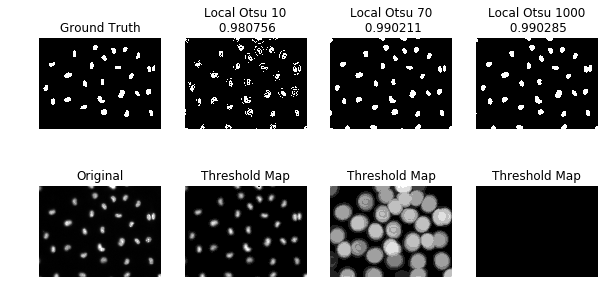

In [12]:
import enhance as enh

figure_local, axes = plt.subplots(2, 4, figsize=(10, 5))
radius_list = [10, 70, 1000]

axes[1][0].imshow(original_image, cmap=plt.cm.gray)
axes[1][0].set_title('Original')
axes[1][0].axis('off')

axes[0][0].imshow(binary_control, cmap=plt.cm.gray)
axes[0][0].set_title('Ground Truth')
axes[0][0].axis('off')

for dx, radius in enumerate(radius_list, 1):
    local_otsu, otsu_mask = enh.local_otsu(original_image, radius)
    match_local = dic.creation_of_match_array(local_otsu, binary_control)
    dice_score_local = dic.dice_score(local_otsu, binary_control)
    score_increase = dice_score_local - dice_score_global
    
    axes[0][dx].imshow(local_otsu, cmap=plt.cm.gray)
    axes[0][dx].set_title(f'Local Otsu {radius}\n {round(dice_score_local, 6)}')
    axes[0][dx].axis('off')
    
    axes[1][dx].imshow(otsu_mask, cmap=plt.cm.gray)
    axes[1][dx].set_title('Threshold Map')
    axes[1][dx].axis('off')
    
plt.show()


In order to find the optimal size for the radius of local thresholding on the data set, the mean Dice score was 
plotted against different radii. Local thresholding is very useful when images have contrast and detailed objects under
a gradient of brightness. It normalizes the overall brightness of each loci and extracts the contrasted detail. The loci
size needs to be set to a level where the optimal threshold does not surpass the peaks of the object's 
contrast but surpasses the whole gradient(or inverted).

In this example:

A too small radius causes the threshold at the outer surrounding of the nuclei to drop under the nucleus' blur. This 
causes spots in the halo area of the nuclei which can be seen in 'Local Otsu 10'. A very large radius cause the 
threshold map to be homogeneous and acts equal as global thresholding but consumes unnecessary computing resources and 
thus time.
  


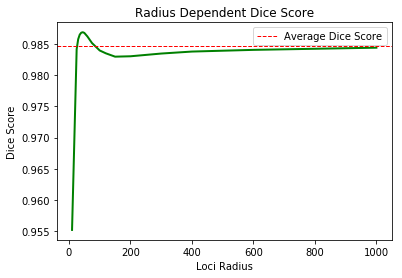

In [3]:
imp.optimal_local_otsu()


The graph shows a maximum specific for this data set at 45 and it is clearly exceeding the average Dice score. Local 
minimum needs further investigation.  

### Filtering
* Gaussian filtering was performed at different sigma values giving a small increase at small sigma values. 
The decrease at larger sigma values derived from resolution loss. 


C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


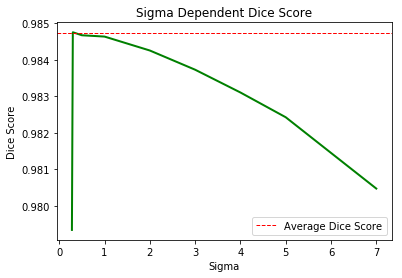

In [4]:
imp.display_improve_gaussian_filter()


* Median filtering for 3 element in each dimension (= 9 pixels)revealed a an increase of more than 0.004 which is over 
25% of the deviation. 

The Dice score increase here as well as the increase of gaussian filtering derives from the noise
reduction and thus the reduction of inhomogeneity especially for small Otsu-loci.
The Dice score revealed that median filtering is superior to gaussian filtering for this data set. Median filtering 
became the method of choice in further processing.    


In [3]:
imp.display_improve_median_filter()


C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Dice score after median filtering 0.9889528785727169
Dice score increase:  0.004213858235344592


### Overlaying edges
The idea hear is to detect the edges of an image and its nuclei and overlay them with the original before thresholding 
to increase the contrast of the area where nucleus and background are meeting. The Sobel filter is used since it is a 
simple method to observe the effect of "edging" the image. The figure below again refers to the images 24h 3. However,
the mean scores at the figure bottom refer to the complete data set.  


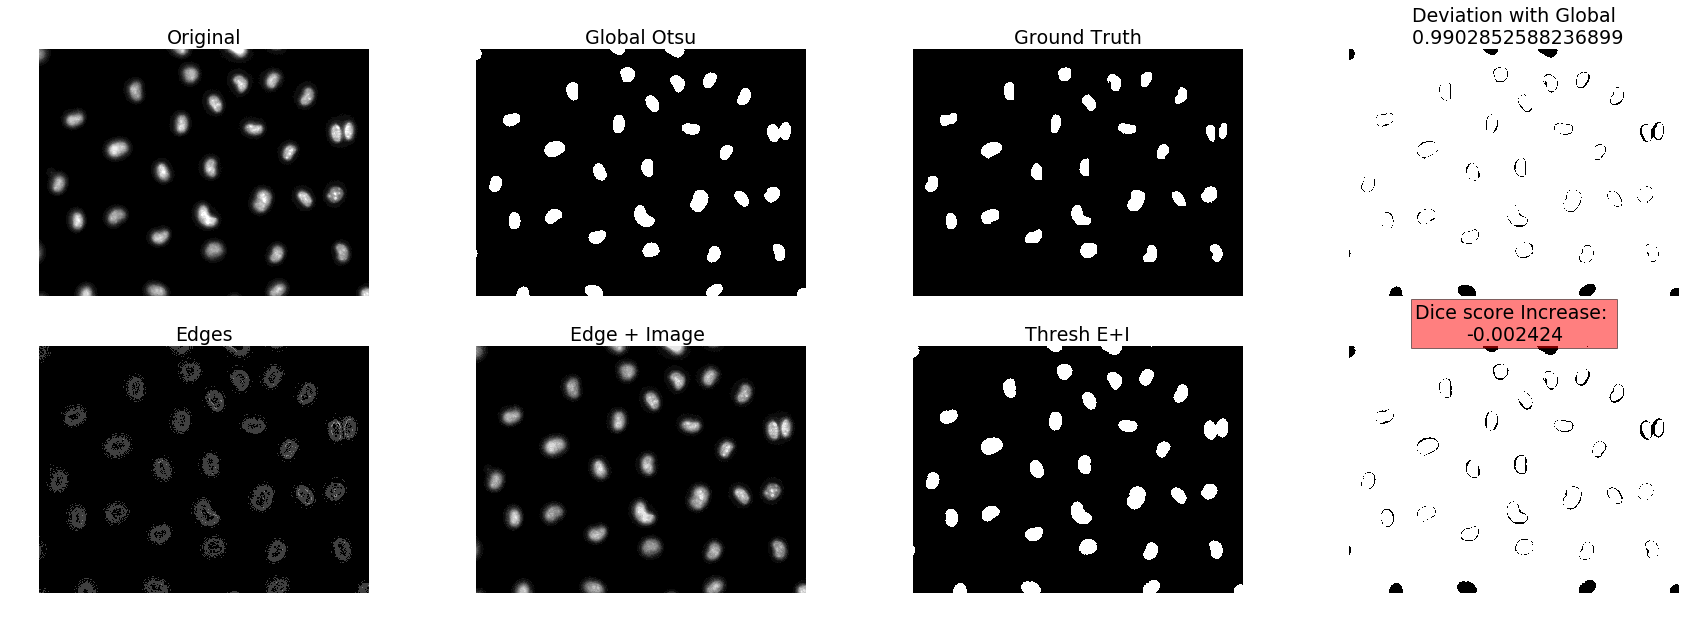

Dice score mean after overlaying the edges is  0.9819265793795561
Average global Dice score :  0.9847390203373723
Increase:  -0.002812440957816187


In [4]:
imp.increase_add_edge()


## Application
To show a possible application, image segmentation and its necessary preparing was performed. To ensure that no small 
objects deriving from the thresholded inhomogeneous background or the nucleus blur were counted and assigned as nucleus 
a minimal size for objects was defines. Every object being smaller was erased. Afterwards every coherent island of pixels 
with a value bigger than zero(background) was declared as one object(nucleus) and coloured. All objects were counted. 
Notice the effect that different thresholding methods have not just on nucleus size(Dice score) but also on their number.     


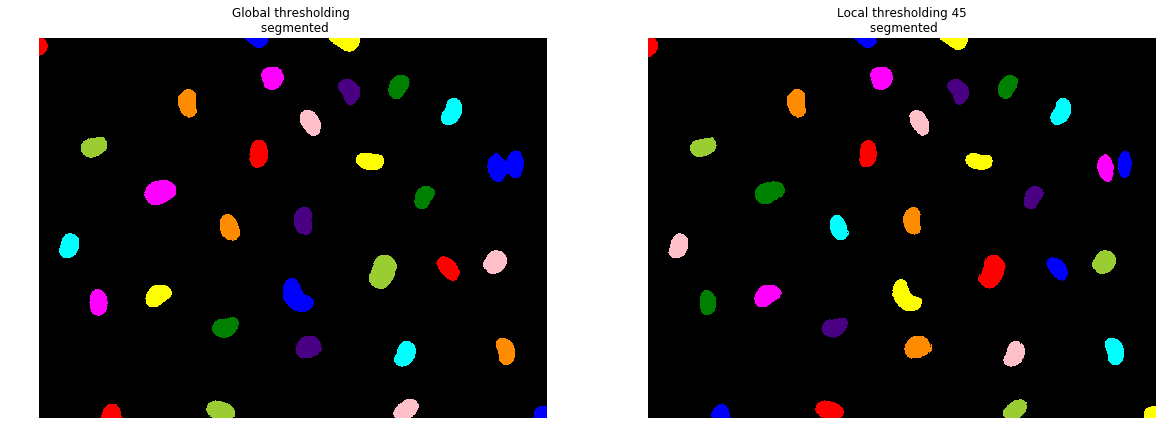

Nucleus number after Global Otsu:  32
Nucleus number after Local Otsu:  33


In [13]:
from scipy import ndimage as ndi
from skimage.color import label2rgb

cleaned_original = enh.small_obj_deletion(binary_otsu, 900)
g_segmented, global_count = ndi.label(cleaned_original)
coloured_global = label2rgb(g_segmented, bg_label=0, bg_color=(0, 0, 0))

local_otsu, mask = enh.local_otsu(original_image, 45)
local_otsu = enh.small_obj_deletion(local_otsu, 900)
l_segmented, local_count = ndi.label(local_otsu)
coloured_local = label2rgb(l_segmented, bg_label=0, bg_color=(0, 0, 0))
 
figure, axes = plt.subplots(1, 2, figsize=(20, 40))

axes[0].imshow(coloured_global, cmap=plt.cm.gray)
axes[0].set_title(f'Global thresholding \n segmented')
axes[0].axis('off')

axes[1].imshow(coloured_local, cmap=plt.cm.gray)
axes[1].set_title(f'Local thresholding 45\n segmented')
axes[1].axis('off')

plt.show()
print('Nucleus number after Global Otsu: ', global_count)
print('Nucleus number after Local Otsu: ', local_count)



## Joining the processing steps to a pipeline. 
The following pipeline has an input of two zipped folders and an output of chosen images being Otsu thresholded globally 
and locally, segmented, nuclei counted, compared and scored. 
Since the ground truth for all 30min images is no available the pipeline was not applied on these images which is why 
the following figure consists of 20 instead of 25 images.

For local Otsu, segmentation and  nuclei count 
intermediate steps were performed.
The axes on horizontal position 1-8 shows:
1. The intensity histogram of the original image and the value of the Otsu treshold   
2. The original untreated image 
3. The image after binarization with the Otsu threshold without further preparation
4. The image after filtering, binarization with local Otsu, deletion of small objects, labeling and colouring
5. The given ground truth
6. The difference between global Otsu and the ground truth and its Dice score
7. The difference between local Otsu (position 4) and the ground truth and its Dice score
8. The increase of the Dice score after comparing local Otsu and its preprocessing to the previous used global 
  thresholding. And the comparison of the nuclei number of the ground truth (position 5), the local Otsu (position 4) 
  and the global Otsu but for segmentation small object deletion was applied (not shown)   


C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Average GlobalDice score:  0.9847390203373723
Average Local Dice score:  0.9875700111455362


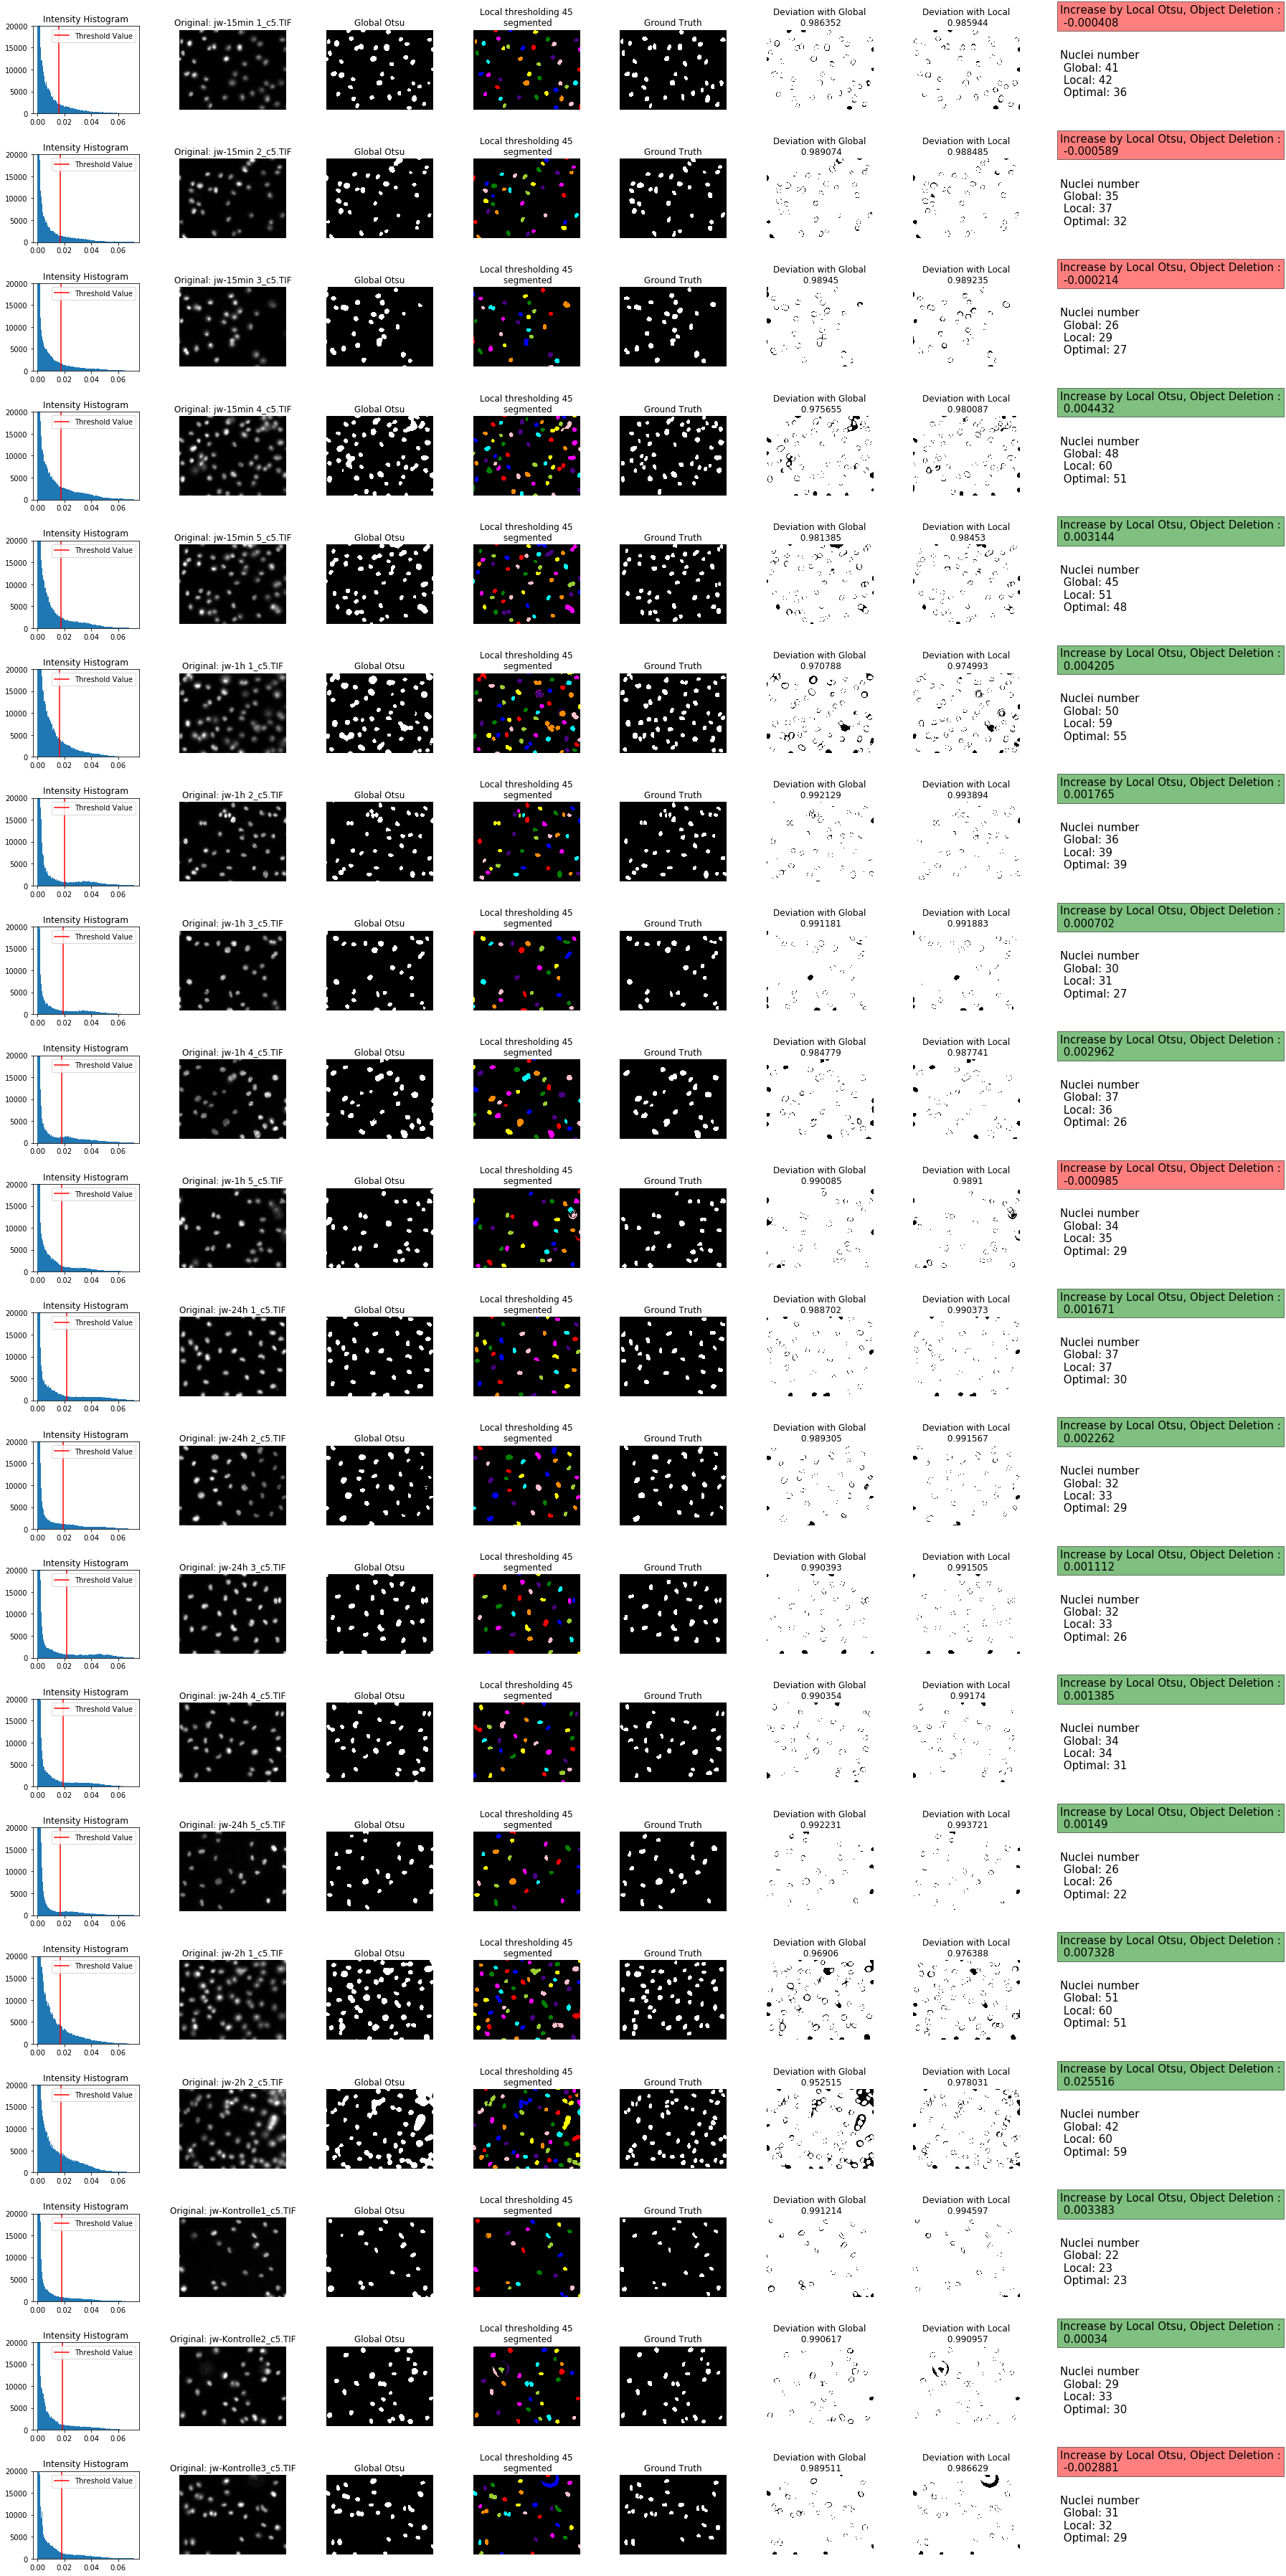

In [2]:
import pipeline
pipeline.main()


# Discussion
This pipeline analyzes images from their raw state to thresholded and filtered images and applies the possible 
further step of segmentation. It returns the thresholded and segmented images as well as numbers of nuclei and a score
for the thresholding deriving from the comparison to given ground truth. Considering that the average global Dice score 
is over 0.98 and thus quite close to the maximum the increases achieved by median filtering and local Otsu is remarkable. 

The Dice score is also pulled down by the fact that not just many nuclei on the images edge are missing on purpose but also 
accidentally in the whole data set. This causes nuclei to seem assigned and thresholded wrong due to a poor ground truth.  
For comparing the score of this pipeline to a foreign system the project of Fehri _et al_ was chosen. They used 
neural networks to segment th data set I used and compared several approaches. Their average Dice score for nuclei 
segmentation reached from 80 to almost 90 depending on the method they used. Machine learning has a 5 folds bigger 
deviation as the common method of Otsu thresholding which is understandable since the training dataset is rather small 
and the images vary im appearance. Furthermore this pipeline and its parameters were tailored around the data set to 
achieve a high Dice score          


## References 
Fehri, H., Gooya, A., Lu, Y., Meijering, E., Johnston, S. A., & Frangi, A. F. (2019). Bayesian Polytrees with Learned 
Deep Features for Multi- Class Cell Segmentation. IEEE Transactions on Image Processing.
